# What are 10 (or more) questions that you hope to answer through your data analysis?

No. | Question
:-:|:-
1 | Which game has more missing data?
2 | How does rating influence sales ?
3 | Which platform is likely to bring in more games in the top sales ?
4 | How does a game doing well in a continent influence its sale for global sales ?
5 | Is it better for game developers to produce more sports game or action games ?
6 | Is it better for game developers to release games that are platform targeted ?
7 | Does the year of release affect the user count ?
8 | Do old games have better ratings compared to new games ?
9 | Does playstation have more top users than xbox ?
10 | which games had proportional EU, NA, and JP sales percentage ?

In [21]:
import pandas
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None
vg_data = pandas.read_csv("Video_Games.csv")
# vg_data.dropna(inplace=True) this is to clean data for all cells


vg_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
vg_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

# ADD discription about data

In [3]:
''' Answering question 1: Which game has more missing data? 
'''

missing_data = vg_data.isnull()
missing_data



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


<AxesSubplot:xlabel='Rating', ylabel='Global_Sales'>

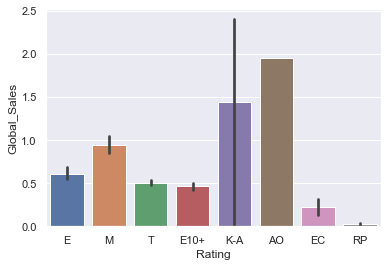

In [10]:
''' Answering question 2: How does rating influence sales ? 
-Game name
-Ratings
-Global sales
-Looking for correlation
'''

performance_data = vg_data[["Name", "Global_Sales", "Rating"]]

clean_data2 = performance_data.dropna()
sns.barplot(x = clean_data2['Rating'], y = clean_data2['Global_Sales'])


<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

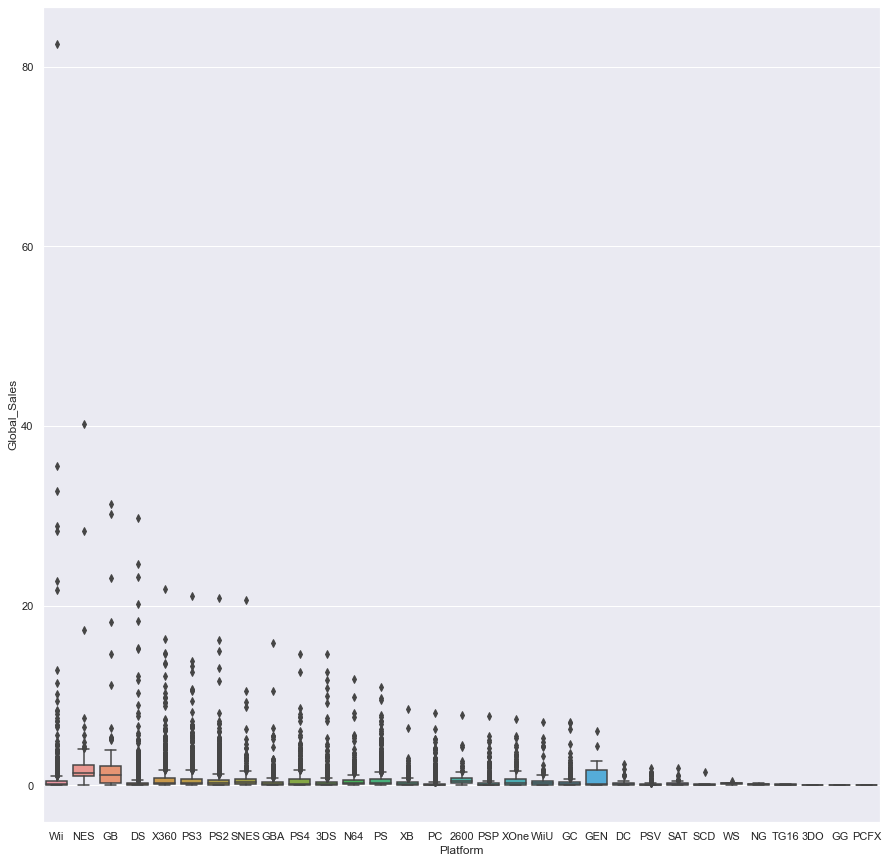

In [22]:
''' Answering question 3: Which platform is likely to bring in more games in the top sales ?
-Platform
-Global sales
-Name
'''

platform_performance = vg_data[["Platform", "Global_Sales", "Name"]]

clean_data3 = platform_performance.dropna()

sns.boxplot(x = clean_data3['Platform'], y = clean_data3['Global_Sales'])


In [6]:
''' Answering question 4: How does a game doing well in a continent influence its sale for global sales ? 
-Na sales
-Eu sales
-Jp sales
-Global sales
-Game name
'''

' Answering question 4: How does a game doing well in a continent influence its sale for global sales ? \n-Na sales\n-Eu sales\n-Jp sales\n-Global sales\n-Game name\n'

In [27]:
''' Answering question 5: Is it better for game developers to produce more sports game or action games ?
-Game name
-Genre (Filter, sports and action)
-Sales for the filtering
'''

clean_data5 = vg_data.dropna()

genre_filtered = clean_data5[ (clean_data5['Genre'] == 'Action') | (clean_data5['Genre'] == "Sports")]
genre_filtered



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16618,Legacy of Kain: Defiance,PC,2003.0,Action,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,70.0,11.0,8.7,67.0,Nixxes Software,M
16624,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+
16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.00,0.00,0.01,81.0,46.0,8.5,151.0,Shin'en,E
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E


<AxesSubplot:xlabel='Platform', ylabel='User_Score'>

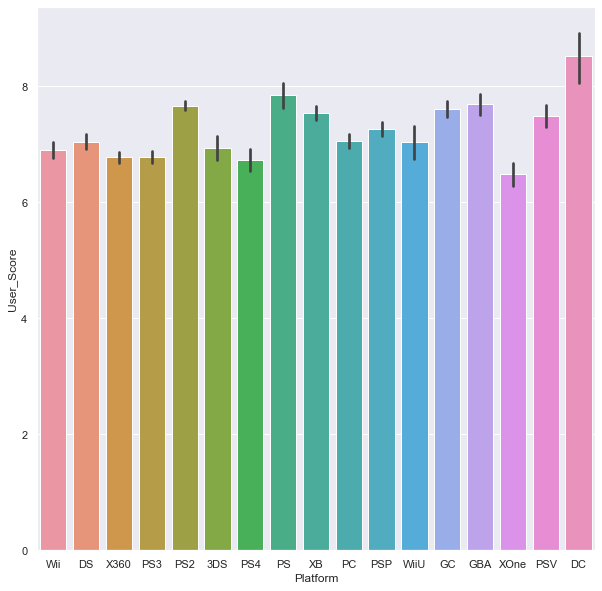

In [9]:
''' Answering question 6: Is it better for game developers to release games that are platform targeted ? 
-Platform
-User score
-Game name
'''
clean_data = vg_data.dropna()
sns.barplot(x = clean_data['Platform'], y = clean_data['User_Score'].astype(float))


In [9]:
''' Answering question 7: Does the year of release affect the user count ? 
-User count
-Game name
-Year of release
'''

' Answering question 7: Does the year of release affect the user count ? \n'

In [10]:
''' Answering question 8: Do old games have better ratings compared to new games ? 
-Ratings
-Game name
-Year of release (filtering)
'''

' Answering question 8: Do old games have better ratings compared to new games ? \n'

In [11]:
''' Answering question 9: Does playstation have more top users than xbox ? 
-Platform (filter)
-User count
-Game name
'''

' Answering question 9: Does playstation have more top users than xbox ? \n'

In [12]:
''' Answering question 10: which games had proportional EU,NA, and JP sales percentage ?
'''

' Answering question 10: which games had proportional EU,NA, and JP sales percentage ?\n'